In [30]:

# Data
# https://www.kaggle.com/rahulin05/sentiment-labelled-sentences-data-set
input_file = open('amazon_cells_labelled.txt',errors='ignore')
output_file = open('output.txt','w')
 
for lines in range(500):
    line = input_file.readline()
    output_file.write(line)

In [31]:
f = open ('output.txt','r')
mensaje = f.read()
print(mensaje)
f.close()

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So G

In [32]:
# https://raw.githubusercontent.com/jesusmiguelgarcia/clase2020tpa/master/output.txt

from urllib import request

url = "https://raw.githubusercontent.com/GabrielGlez/ProgAdv/master/amazon_cells_labelled.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')



In [33]:
raw[:100]

'So there is no way for me to plug it in here in the US unless I go by a converter.\t0\nGood case, Exce'

In [0]:
# como separar etiqueta - __label__2 = 2  y   texto que corresponde texto[0]
# __label__2 = 2 estrellas en review de amazon

# __label__1 corresponds to 1- and 2-star reviews, and __label__2 corresponds to 4- and 5-star reviews.

# etiquetas = [2, ]
# texto = [ "Sets the stage: House of Cards: In this first installment we are introduced to",  ]

In [15]:
lineasTexto = raw.split("\n")

In [16]:
len(lineasTexto)

488

In [17]:
lineasTexto[0]

"__label__2 Sets the stage: House of Cards: In this first installment we are introduced to our main characters as they transverse their separate storylines. Apart from each other we learn their individual strengths as they prove what they are made of and watch as they struggle through dire circumstances sometimes narrowly avoiding death itself.If you are a fan of Star Trek: TNG then you'll be right at home with this series. Even if you are new to the Expanded Universe of Trek I have no doubt that you'll enjoy these books.\r"

In [18]:
lineasTexto[0][:11]

'__label__2 '

In [19]:
lineasTexto[0][11:]

"Sets the stage: House of Cards: In this first installment we are introduced to our main characters as they transverse their separate storylines. Apart from each other we learn their individual strengths as they prove what they are made of and watch as they struggle through dire circumstances sometimes narrowly avoiding death itself.If you are a fan of Star Trek: TNG then you'll be right at home with this series. Even if you are new to the Expanded Universe of Trek I have no doubt that you'll enjoy these books.\r"

In [20]:
int(lineasTexto[0][9])

2

In [21]:
etiquetas = []
textos = []
for linea in lineasTexto:
  if len(linea) > 10:
    etiquetas.append(int(linea[9]))
    textos.append(linea[11:])


In [22]:
len(etiquetas) # clases

487

In [23]:
len(textos) # textos

487

In [24]:
etiquetas[:2]

[2, 2]

In [25]:
textos[:2]

["Sets the stage: House of Cards: In this first installment we are introduced to our main characters as they transverse their separate storylines. Apart from each other we learn their individual strengths as they prove what they are made of and watch as they struggle through dire circumstances sometimes narrowly avoiding death itself.If you are a fan of Star Trek: TNG then you'll be right at home with this series. Even if you are new to the Expanded Universe of Trek I have no doubt that you'll enjoy these books.\r",
 'The New Frontiers of Trek... really new?: The thing to remember about Peter David is that he thrives on recurring characters. Those characters which he has made up before (Stone, "Rock and a Hard Place;" Delcara, "Vendetta;" etc) function by sounding off of the great characterization he gives to the already known cast. That is David\'s strength and I feel that "New Frontier" is an experimental place for him. Not the great read that "Imzadi" or "Q-Squared" was but better t

In [26]:
# representacion TF-IDF

# Lista_de_documentos_textos
# etiquetas ???

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer( analyzer = "word", ngram_range=(1, 1), stop_words='english' ,  min_df = 5, token_pattern = r"\w+", binary=False )  # se apaga conteo binario

# genero representacion tfidf
representacion_tfidf = tf.fit_transform(textos).toarray()

vocabulario_attributos = tf.get_feature_names()

print("vocabulario:",len(vocabulario_attributos))
print("primeros 20 atributos:",vocabulario_attributos[:20])
print("primer instacia sus primeras 20 atrubutos:")
print(representacion_tfidf[0][:50])




vocabulario: 647
primeros 20 atributos: ['1', '10', '15', '2', '20', '3', '4', '5', '50', '6', '8', '9', 'able', 'absolutely', 'acting', 'actually', 'add', 'addition', 'adventure', 'age']
primer instacia sus primeras 20 atrubutos:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.27509581 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [27]:
from sklearn import tree

X = representacion_tfidf
y = etiquetas

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [28]:
tree.plot_tree(clf) 

[Text(436.2908805031447, 364.60540540540535, 'X[242] <= 0.107\ngini = 0.5\nsamples = 487\nvalue = [237, 250]'),
 Text(395.2987421383648, 354.6162162162162, 'X[363] <= 0.126\ngini = 0.497\nsamples = 409\nvalue = [220, 189]'),
 Text(366.34591194968556, 344.627027027027, 'X[240] <= 0.129\ngini = 0.5\nsamples = 380\nvalue = [192, 188]'),
 Text(327.15723270440253, 334.6378378378378, 'X[176] <= 0.155\ngini = 0.496\nsamples = 335\nvalue = [182, 153]'),
 Text(320.9182389937107, 324.64864864864865, 'X[164] <= 0.119\ngini = 0.491\nsamples = 321\nvalue = [182, 139]'),
 Text(295.5723270440252, 314.6594594594594, 'X[487] <= 0.154\ngini = 0.484\nsamples = 305\nvalue = [180, 125]'),
 Text(263.5974842767296, 304.67027027027024, 'X[456] <= 0.096\ngini = 0.469\nsamples = 272\nvalue = [170, 102]'),
 Text(237.08176100628933, 294.68108108108106, 'X[377] <= 0.12\ngini = 0.446\nsamples = 238\nvalue = [158, 80]'),
 Text(221.48427672955975, 284.6918918918919, 'X[539] <= 0.158\ngini = 0.433\nsamples = 230\nvalu

In [29]:
import graphviz 


dot_data = tree.export_graphviz(clf, out_file=None, feature_names=vocabulario_attributos, 
                                class_names=["1","2","3","4","5"], filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)   
graph.render("review") 



graph 


ModuleNotFoundError: No module named 'graphviz'

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X = representacion_tfidf
y = etiquetas

clf = tree.DecisionTreeClassifier(random_state=0)

print("Validacion a 10 pliegues")
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

cv = cross_val_score(clf, X, y, cv=10, scoring="accuracy")

# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


print("exactitud por cada pliegue")
print(cv)
print("exactitud promedio ")
print(cv.mean())
print("desviacion estandar de promedio de exactitud ")
print(cv.std())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

X = representacion_tfidf
y = etiquetas

# Ahora podemos probar rápidamente un conjunto de entrenamiento mientras conservamos el 40% de los datos para probar (evaluar) nuestro clasificador:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Conjunto de entrenamiento 70% ")
print(len(X_train))

print("Conjunto de prueba 30% ")
print(len(X_test))

clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

print("Exactitud ")
print(clf.score(X_test, y_test))

preds = clf.predict(X_test)


In [ ]:
# Resuelto se crea frame de pandas y luego se crea matriz de confusion
import pandas as pd

y_true = y_test
y_pred = list(preds)

df = pd.DataFrame({'y_true': y_true,
                   'y_pred': y_pred})

cm = pd.crosstab(df['y_true'], df['y_pred'])
print(cm)

In [ ]:
# Otra forma mas sencilla

from sklearn.metrics import confusion_matrix

y_pred = list(preds)
y_true = y_test

confusion_matrix(y_true, y_pred)

In [20]:
set(y_test)

{1, 2}

In [22]:
len(y_test)

147

In [21]:
set(preds)

{1, 2}

In [23]:
len(preds)

147

In [26]:
list(preds[:20])

[2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2]

In [24]:
y_test[:20]

[1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2]

In [0]:
list(preds[:20])

[2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2]

Grafica las instancias del corpus reduciendo su dimensionalidad con PCA (Principal component analysis) a dos características y grafica al árbol de decisión

In [0]:
# reduciendo su dimensionalidad con PCA

X = representacion_tfidf
y = etiquetas

len(X[0])

647

In [0]:
# 647 -> 2  PCA

In [0]:
from sklearn.decomposition import PCA

X = representacion_tfidf
y = etiquetas # no la usamos

X_reduced = PCA(n_components=2).fit_transform(X)


In [0]:
X_reduced[0]

array([0.02519389, 0.03068621])

In [0]:
X_reduced[1]

array([ 0.05317291, -0.02033109])

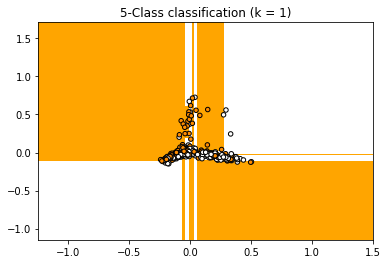

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X_reduced
y = etiquetas # no la usamos

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue','yellow','white'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue','yellow','white'])

for n_neighbors in [1]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = tree.DecisionTreeClassifier()
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("5-Class classification (k = %i)"
              % (n_neighbors))

plt.show()

In [0]:
y_test[:20]

[1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2]

In [0]:
list(preds)

[2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1]

In [0]:
from nltk import word_tokenize
tokens = word_tokenize(raw)           # tokeniza
words = [w.lower() for w in tokens]   # normaliza a minisculas
vocab = sorted(set(words))            # ordena y obtiene vocabulario
type(vocab)
print("tokens - palabras con simbolos:",len(tokens))
print("palabras en minusculas",len(words))
print("vocabulario:",len(vocab))

tokens - palabras con simbolos: 44059
palabras en minusculas 44059
vocabulario: 5794


In [0]:
import nltk
#lista de terminos mas frecuentes y su frecuencia
freq = nltk.FreqDist(tokens)
for key,val in freq.items():
    print (str(key) + ':' + str(val))

__label__2:250
Sets:1
the:1649
stage:4
::522
House:1
of:690
Cards:1
In:21
this:478
first:77
installment:2
we:66
are:221
introduced:3
to:909
our:32
main:9
characters:29
as:169
they:154
transverse:1
their:35
separate:4
storylines:1
.:1998
Apart:1
from:113
each:20
other:63
learn:11
individual:1
strengths:1
prove:2
what:88
made:35
and:972
watch:11
struggle:4
through:31
dire:1
circumstances:1
sometimes:5
narrowly:1
avoiding:1
death:2
itself.If:1
you:283
a:918
fan:14
Star:5
Trek:4
TNG:1
then:50
'll:23
be:167
right:35
at:112
home:7
with:289
series:23
Even:8
if:92
new:52
Expanded:1
Universe:2
I:1105
have:267
no:76
doubt:5
that:356
enjoy:8
these:85
books:41
The:251
New:3
Frontiers:1
...:124
really:99
?:78
thing:22
remember:3
about:115
Peter:2
David:2
is:623
he:62
thrives:1
on:260
recurring:2
Those:1
which:45
has:97
up:88
before:30
(:124
Stone:1
,:1266
``:132
Rock:2
Hard:4
Place:1
;:27
'':144
Delcara:1
Vendetta:1
etc:12
):125
function:3
by:74
sounding:3
off:51
great:110
characterization:2
gives:

strips:1
sour:1
cream:2
Instead:2
donuts:1
family:14
brunch:1
DON:1
`:1
T:1
BE:1
SCARED:1
OFF:1
BY:1
MOVIE:8
Ok:2
sucked.BIG:1
TIME:2
expectations:5
movie.Well:1
appearently:1
not.It:1
bad:24
With:6
able:12
creat:1
mediocre:4
You:24
regret:4
Ancient:1
curses:1
Have:6
Pendergast:3
dive:1
thrilling:2
ride:3
indeed:2
Reminded:1
Crichton:1
Every:6
exhibit:3
museum:11
anywhere:5
world:10
reminded:1
stuff:5
stolen:1
and/or:2
plundered:1
How:10
displaying:1
mummies:1
grave-robbery:1
And:18
yet:9
privilege:1
museums:1
afford:3
curse:1
moving:3
places:3
belong:2
Taunt:1
exciting:5
thriller:6
visitors:1
Natural:1
History:2
calls:3
Police:1
headed:1
truculent:1
hard-nosed:1
Lt.:1
D'Agosta:2
FBI:1
Agent:2
quirky:1
unorthodox:1
investigator:1
south:1
What:24
discover:1
believe:14
serial:1
killer:2
loose-:1
perhaps:3
intending:1
derail:1
Superstition:1
know:37
sinister:1
lives:2
basement:2
date:3
nears:1
agents:1
team:1
scientists:1
bottom:3
murders:1
late:3
listened:3
unabridged:1
edition:7
Relic:2

compartments:3
roof:1
hold:15
dog:3
biscuit:1
max:1
lids:1
arrived:5
broken:5
anyway:1
Construction:1
screams:1
included:4
travel:4
dish:3
dozen:2
pieces:21
kibble:1
useless:4
medium/large:1
size:13
medium:1
lb:3
beagle:1
trying:11
resell:1
cat:4
owner:1
discount:1
pet:3
carrier:3
somewhere:2
seatbelt:1
wraps:1
securely:2
storage:2
closures:1
repeatedly:2
apart:4
clips:1
eventually:2
weaken:1
leave:8
2-prong:1
latch:1
SO:1
open:5
impossible:5
breeze:1
handy:1
Altogether:1
pleased:10
Though:2
pink:1
blue:4
Close:1
Cigar:1
Harmony:1
520:1
unfortunately:3
falls:5
Here:2
problems.1:1
Is:10
unable:4
Sony:23
player:11
control:6
Ive:1
walk:1
across:6
switch:2
input:1
receiver.2:1
Same:1
X-box:1
360:1
Only:9
functions:1
X-box.The:1
integrated:1
Hopefully:1
Logitech:1
Terrific:1
Ashleigh:4
spotlight:2
Christina:5
{:1
writen:1
}:1
sorta:2
Sammy:2
Cindy:3
numbered:1
50:7
higher:4
Super:1
Edition:1
Ben:1
Tor:1
Parker:6
girlfriend:1
Knock-off:1
LOVE:1
Melissa:4
Doug:4
products:7
durable:5
grow:1
de

entitled:1
Theory:1
Clocks:1
file:2
supposed:2
Mr.:3
Trower:5
Lost:1
Hendrix:1
shadow:1
favorites:2
lessons:4
stand-in:1
Robin:1
licks:1
'face-pulling:1
king:1
riffs:1
must-have:1
meek:1
.until:1
Clapton:1
Page:1
guitarist:1
likes:2
Stokes:1
Select:2
Clamp:1
Deck:1
Hook:1
locally:1
roughly:1
amazed:2
hefty:1
clamp:3
railing:1
deck:2
remove:1
screw:1
biggie:1
Ideal:1
ports:1
ideal:3
case:11
thr:1
cord:20
attaches:2
Priced:1
cheaply:2
connectivity:1
unreliable-:1
budge:1
disconnect.I:1
hubs:1
220v:1
compatability:1
trait:1
Magical:1
title:5
Rascal:2
addresses:1
reality:3
nest:1
poignant:1
Heartbeat:1
Heaven:1
prayful:1
Breathing:1
Sense:1
Humor:1
tribute:1
passed:1
Know:1
Exactly:2
powerful:2
dies:1
Don:1
Whites:1
spoken:1
word:3
Vice:1
Shannon:1
Tweed:1
semi:1
softer:1
adult:1
films:2
cop:1
Phone:1
range:3
handset:4
Lousy:1
customer:6
system:8
expense:1
therefore:2
PO:1
GREAT:1
postage:3
UNIT:2
REBUILT:1
rebuilt:2
payed:1
namely:1
additional:3
hassle:1
offer:2
reimburse:1
Panasonic:3
re

doctor:2
Lottie:1
crutch:1
suitably:1
well-rounded:1
tortured:1
loner:1
angle:1
up.While:1
Federal:1
Theater:1
Project:1
resting:1
reputation:1
Was:5
detective:1
thinly:1
veiled:1
Regardless:1
tedious:4
lover:3
Dickey:4
Deliverance:1
vastly:1
struggled:1
rewards:1
pulp:1
Umberto:1
Eco:1
succeed:1
hitch:1
muscular:1
illusory:1
prose:1
Sea:1
cure:1
insomnia:1
Alnilam:1
initially:1
knock:1
staying:1
Ever:2
Albums-you'd-take-with-you-if-you-were-going-to-be-stranded-on-a-desert-island:1
-type:1
Yes:3
rocks:1
ballads:1
Attitude:3
appropriate:1
here.I:1
Frigate:2
raving:1
years.Anyway:1
test:3
huband:1
Shipping:1
accordingly:1
lead:2
Toad:3
album.When:1
re-discovered:1
moment:1
emotion:1
profound:1
Glen:4
Any:1
Music:2
Lover:1
Winter:1
Pays:1
Summer:1
Phillips:1
captured:1
modern:1
brilliant:2
sing:1
windows:1
rolled:1
Finally:2
Fading:1
Falling:1
Cleareyed:1
haunting:1
Released:1
Wet:1
Sprocket:1
grown:1
Exciting:1
Album:1
Solo:2
Career:1
solo:2
breakup:1
GUSH:1
deep:1
musician:1
songwriter

techniques:1
comprehensive:2
thorough:1
gardening:2
seeking:1
credibility:1
Truman:1
ME:1
WHY:1
identical:1
MONTH:1
wave:1
Daddy:1
fame:1
presidency:1
Old:1
Friend:1
path:1
natural:1
medicine:1
advice:2
practices:1
WORK.With:1
becoming:1
'Disease:1
Care:1
answers:1
need.The:1
opening:1
User:1
Friendly:1
Found:1
autism:5
diagnosed:1
tops:1
down.Other:1
inadequate:1
DAY:1
Superb:1
blending:1
viewpoints:1
.Excellent:1
breakdown:1
challenges:1
symptoms:1
biggest:1
concern:1
there.I:1
Behavior:1
Intervention:1
Teacher:1
integrate:1
home.I:1
MUST:1
wow:2
Dean:2
Koontz:3
freaked:1
passion:1
realism:2
boy:1
bugs:1
lol:1
LOL:1
um:1
comment:2
1-star:1
BlueNote:1
BEWARE:1
Dec.:1
25th:1
transmitter:7
transmitter-:1
NO:1
requiring:1
necessary:1
educated:1
decision:1
slippery:1
tactic:1
merely:1
neat:1
premise:1
meanders:1
intricacies:1
Indian:1
topography:1
Sri:1
Lanka:1
Probably:1
Jaffna:1
Mullaitivu:1
awful.It:1
glum:1
names:1
detours:1
neighbour:1
Alto:1
sax:1
inheritance:1
Unrealistic:1
Wireles

In [0]:
#valores que solo se muestran una sola vez en el documento
for key,val in freq.items():
    if(val==1):
        print (str(key) + ':' + str(val))

Sets:1
House:1
Cards:1
transverse:1
storylines:1
Apart:1
individual:1
strengths:1
dire:1
circumstances:1
narrowly:1
avoiding:1
itself.If:1
TNG:1
Expanded:1
Frontiers:1
thrives:1
Those:1
Stone:1
Place:1
Delcara:1
Vendetta:1
Frontier:1
Imzadi:1
Q-Squared:1
wit:1
Pocket:1
Outstanding:1
'dj:1
James:1
Holden:1
legends:1
Weatherall:1
familiarization:1
introduce:1
Children:1
animated:1
inviting:1
Volumes:1
Volume:1
Thunder:1
efforts:1
Kay:1
proficient:1
lineup:1
musicianship:1
legendary:1
reaffirming:1
coined:1
phrase:1
Basic:1
spell:1
situations:1
Wiccan:1
traditions:1
Besides:1
suggesting:1
Roots:1
Reader:1
fragmentary:1
sample:1
not.This:1
scientific:1
among:1
believed:1
requiered:1
humanistic:1
education:1
Table:1
Contents:1
yourself.You:1
previously:1
anthology:1
masterful:1
collage:1
joyful:1
6330:1
cpu:1
functioning:1
manual:1
glitch:1
Reviews:1
owners:1
quits:1
recognizing:1
cds:1
media:1
DVDs:1
Dont:1
couch:1
potato:1
web:1
searches:1
rated:1
trails:1
ton:1
plants:1
hike.i:1
Walks:1


handy:1
Altogether:1
pink:1
Close:1
Cigar:1
Harmony:1
520:1
problems.1:1
Ive:1
walk:1
input:1
receiver.2:1
Same:1
X-box:1
360:1
functions:1
X-box.The:1
integrated:1
Hopefully:1
Logitech:1
Terrific:1
{:1
writen:1
}:1
numbered:1
Super:1
Edition:1
Ben:1
Tor:1
girlfriend:1
Knock-off:1
LOVE:1
grow:1
developmentally:1
resembled:1
raw:1
cut-outs:1
paint:1
painted:1
'logo:1
exited:1
particle:1
melts:1
Compared:1
toddler:1
overly:1
Plan:1
Game:1
gamers:1
rookies:1
ability:1
Husband:1
steady:1
dependability:1
LED:1
Spend:1
20.00:1
w/babies:1
22:1
mo:1
visiting:1
houses:1
secure:1
active:1
harness:1
chair:1
unusually:1
clinical:1
Trigger:1
Therapy:1
technique:1
patients:1
literature:1
research:1
myofascial:1
dysfunction:1
dumb:1
laugh:1
Eight:1
screwing:1
lust:1
Alan:1
Jon:1
Tenney:1
ass:1
Saffron:1
Burrows:1
Zoey:1
sociopath:1
hilarious:1
Name:1
dare:1
SurgeArrest:1
Three:1
neutral:1
ground:1
pole:1
garage:1
opener:1
furnace:1
2000:1
homeowners:1
computers:1
desktop:1
1200:1
regulator:1
PRO:1
15

burrow:1
Gosh:1
advantage:1
money-back:1
guarantee.I:1
dumps:1
doorstep:1
stinking:1
fish:1
newspaper:1
assaulted:1
vitriol:1
HPC:1
content.I:1
slogged:1
rhetoric:1
tidy:1
closed:1
unsatisfied:1
disappointed.If:1
glaze:1
Above-average:1
BLACKLIST:1
Parestsky:1
homage:1
Ross:1
Macdonald:1
VI:1
investigation:1
reporter:1
uncovers:1
cesspool:1
fifty-year-old:1
troubles:1
infidelities:1
intrigues:1
backstabbing:1
betrayal:1
rich-folk:1
cussedness:1
marred:1
ham-fisted:1
Which:1
good.Happy:1
Pete:1
Tillman:1
blacklist:1
Crown:1
Princess:1
Crime:1
Novels:1
throne:1
Blacklisting:1
infamous:1
P.I:1
remarks:1
Truer:1
spoken.Paretsky:1
20-something:1
developing:1
Lottie:1
crutch:1
suitably:1
well-rounded:1
tortured:1
loner:1
angle:1
up.While:1
Federal:1
Theater:1
Project:1
resting:1
reputation:1
detective:1
thinly:1
veiled:1
Regardless:1
Deliverance:1
vastly:1
struggled:1
rewards:1
pulp:1
Umberto:1
Eco:1
succeed:1
hitch:1
muscular:1
illusory:1
prose:1
Sea:1
cure:1
insomnia:1
Alnilam:1
initially:

preying:1
searching:1
predicts:1
May:1
2001:1
doom:1
cult:1
guru:1
hard-earned:1
income.Even:1
intellectual:1
choppy:1
continuity:1
predicting:1
self-glorification:1
Lambke:1
documents:1
Olympian:1
gold:1
medalist:1
pity:1
helplessness:1
joyous:1
accomplishments:1
forgetful:1
packed:1
whats:1
heartbreak:1
TALENT:1
BEYOND:1
COMPARE:1
showtunes:1
story-line:1
liberal:1
Smash:1
chosen:1
Season:1
chords:1
simplicity:1
novice:1
historical:1
comments:1
McNeil:1
reviewing:1
pertain:1
melody:1
AKAI:1
DS8341:1
companies:1
capturing:1
sub:1
social:1
obsessive:1
compulsive:1
parental:1
Thin:1
Plot:1
Wayyyyy:1
Souling:1
Searching:1
portions:1
elementary:1
reveal:1
telegraphed:1
final:1
dramatic:1
culimating:1
comical:1
protagonist:1
victims:1
Gave:1
diligence:1
downloading:1
producing:1
Miggy:1
.Could:1
dribble:1
mystery/thriller:1
ratings:1
till:1
shocked:1
Story:1
grabs:1
bogs:1
predictable:1
enjoys:1
seat:1
Stunning:1
turner:1
myriad:1
marvelous:1
tangle:1
courtroom:1
Stopped:1
recommendation:1

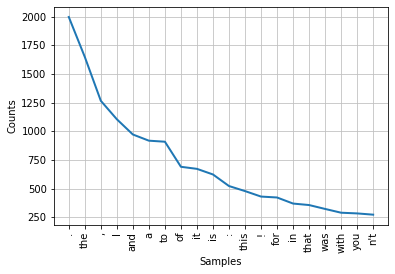

In [0]:
#con el uso de la variable freciuencia tomamos 
#20 valores de las pabras repetidas en el documento
freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

In [0]:
from nltk.corpus import stopwords
stopwords.words('english')
#palabras vacias en su idioma

tokenizer = nltk.RegexpTokenizer(r"\w+")  # solo selecciona palabras \w+
new_tokens = tokenizer.tokenize(raw)

sr = stopwords.words('english')
words = [w for w in new_tokens if w.lower() not in sr]    # normaliza a minisculas

In [0]:
len(words)

19710